In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline 

In [2]:
df= pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split

In [4]:
x=df.iloc[:,3:-1]
y=df.iloc[:,-1]

In [5]:
oe=OrdinalEncoder()

x.loc[:,"Geography":'Gender']=oe.fit_transform(x.loc[:,"Geography":'Gender'])
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0.0,0.0,42,2,0.00,1,1,1,101348.88
1,608,2.0,0.0,41,1,83807.86,1,0,1,112542.58
2,502,0.0,0.0,42,8,159660.80,3,1,0,113931.57
3,699,0.0,0.0,39,1,0.00,2,0,0,93826.63
4,850,2.0,0.0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0.0,1.0,39,5,0.00,2,1,0,96270.64
9996,516,0.0,1.0,35,10,57369.61,1,1,1,101699.77
9997,709,0.0,0.0,36,7,0.00,1,0,1,42085.58
9998,772,1.0,1.0,42,3,75075.31,2,1,0,92888.52


In [6]:
sc=StandardScaler()

x=sc.fit_transform(x)

In [7]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y ,test_size=0.2,random_state=1)

In [8]:
ann=Sequential()

ann.add(Dense(units=30, activation='relu'))
ann.add(Dense(units=20,activation='relu'))

ann.add(Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss= 'binary_crossentropy')

ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=250)

Epoch 1/250
250/250 [==============================] - 3s 5ms/step - loss: 0.5038 - val_loss: 0.4441
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4308 - val_loss: 0.4199
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4106 - val_loss: 0.3986
Epoch 4/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3877 - val_loss: 0.3720
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3672 - val_loss: 0.3554
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3560 - val_loss: 0.3483
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3486 - val_loss: 0.3423
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3447 - val_loss: 0.3372
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3415 - val_loss: 0.3362
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3382 - val_lo

<AxesSubplot:>

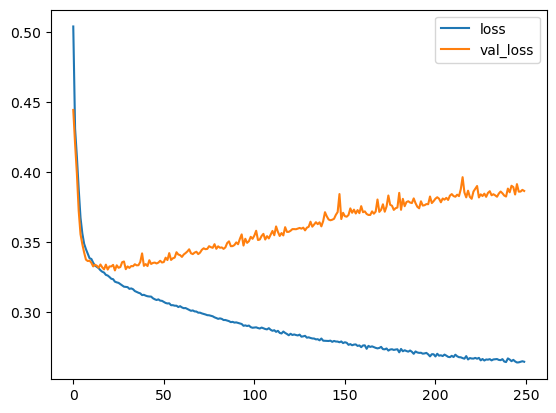

In [9]:
val_loss=pd.DataFrame(ann.history.history)

val_loss.plot()

# Early Stopping

In [10]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=20)

In [13]:
ann=Sequential()

ann.add(Dense(units=30,activation='relu'))
ann.add(Dense(units=20,activation='relu'))

ann.add(Dense(units=1,activation='sigmoid'))

ann.compile(optimizer='adam',loss='binary_crossentropy')

ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),callbacks=[early],epochs=250)

Epoch 1/250
250/250 [==============================] - 2s 4ms/step - loss: 0.5006 - val_loss: 0.4360
Epoch 2/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4271 - val_loss: 0.4099
Epoch 3/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4009 - val_loss: 0.3834
Epoch 4/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3766 - val_loss: 0.3615
Epoch 5/250
250/250 [==============================] - 1s 4ms/step - loss: 0.3627 - val_loss: 0.3554
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3561 - val_loss: 0.3480
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3518 - val_loss: 0.3446
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3482 - val_loss: 0.3392
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3465 - val_loss: 0.3382
Epoch 10/250
250/250 [==============================] - 1s 3ms/step - loss: 0.3437 - val_lo

<AxesSubplot:>

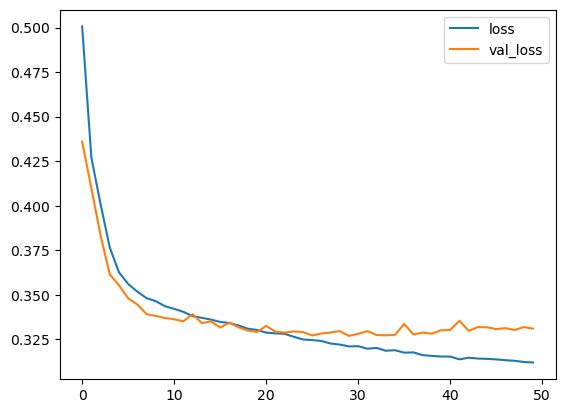

In [14]:
early_loss =pd.DataFrame(ann.history.history)

early_loss.plot()

# Drop Out Layer

In [15]:
ann= Sequential()

ann.add(Dense(units=30, activation ='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation ='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy')

ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),callbacks=[early],epochs=250)


Epoch 1/250
250/250 [==============================] - 3s 6ms/step - loss: 0.5630 - val_loss: 0.4787
Epoch 2/250
250/250 [==============================] - 1s 4ms/step - loss: 0.5039 - val_loss: 0.4529
Epoch 3/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4844 - val_loss: 0.4396
Epoch 4/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4717 - val_loss: 0.4301
Epoch 5/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4570 - val_loss: 0.4256
Epoch 6/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4554 - val_loss: 0.4212
Epoch 7/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4553 - val_loss: 0.4208
Epoch 8/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4436 - val_loss: 0.4123
Epoch 9/250
250/250 [==============================] - 1s 3ms/step - loss: 0.4485 - val_loss: 0.4135
Epoch 10/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4425 - val_lo

<AxesSubplot:>

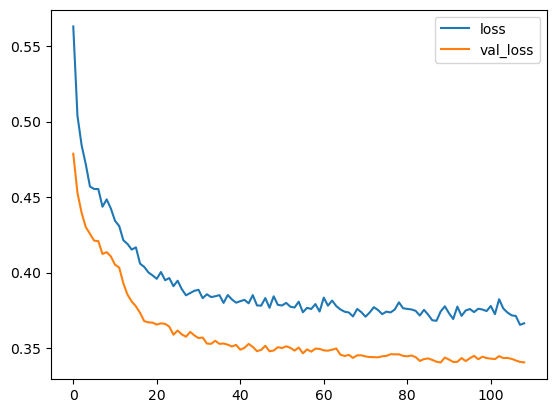

In [16]:
drop_loss =pd.DataFrame(ann.history.history)
drop_loss.plot()

# Early Stopping + Dropout Layer

In [17]:
ann= Sequential()

ann.add(Dense(units=30, activation ='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=20, activation ='relu'))
ann.add(Dropout(rate=0.5))

ann.add(Dense(units=1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy')

ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),callbacks=[early],epochs=250)


Epoch 1/250
250/250 [==============================] - 2s 4ms/step - loss: 0.5581 - val_loss: 0.4597
Epoch 2/250
250/250 [==============================] - 1s 5ms/step - loss: 0.4976 - val_loss: 0.4438
Epoch 3/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4772 - val_loss: 0.4349
Epoch 4/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4681 - val_loss: 0.4296
Epoch 5/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4539 - val_loss: 0.4229
Epoch 6/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4530 - val_loss: 0.4183
Epoch 7/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4435 - val_loss: 0.4124
Epoch 8/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4457 - val_loss: 0.4116
Epoch 9/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4335 - val_loss: 0.4039
Epoch 10/250
250/250 [==============================] - 1s 4ms/step - loss: 0.4360 - val_lo

<AxesSubplot:>

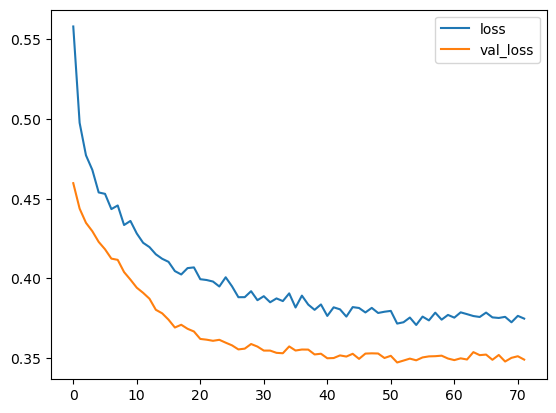

In [18]:
de_loss =pd.DataFrame(ann.history.history)
de_loss.plot()

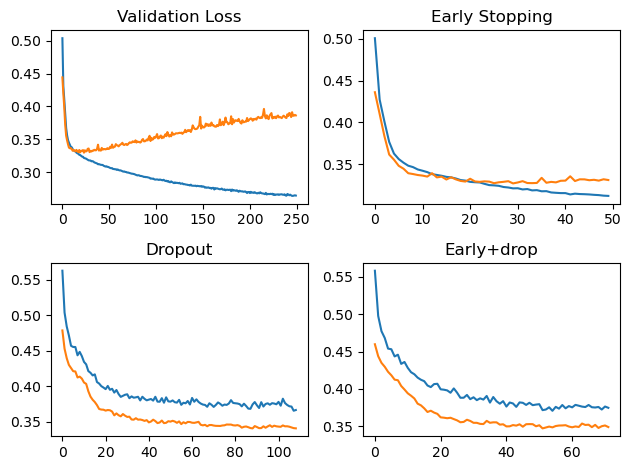

In [21]:
plt.subplot(2,2,1)
plt.plot(val_loss)
plt.title('Validation Loss')

plt.subplot(2,2,2)
plt.plot(early_loss)
plt.title('Early Stopping')

plt.subplot(2,2,3)
plt.plot(drop_loss)
plt.title('Dropout')

plt.subplot(2,2,4)
plt.plot(de_loss)
plt.title('Early+drop')

plt.tight_layout()